<a href="https://colab.research.google.com/github/JamesGilJGBS/Portifolio/blob/main/SEO/GoogleTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SimpreNina

SEO(Search Engine Optimization) para loja virtual de laços, tiaras, e turbantes siemprenina.com.br

Análise do Google Trends de palavras chaves e ocorrências geográficas.

## Bibliotecas:

In [1]:
#!pip install pytrends
#!pip install pyodbc
#!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import timezone, datetime, timedelta, date
import seaborn as sns
sns.set()

import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.offline as pyo
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt

import requests
import pyodbc
import hashlib
from pytrends.request import TrendReq
pytrends = TrendReq(hl='pt-BR', tz=360)

import json

## Tendências do dia no Brasil.

In [3]:
# Get Google Hot Trends data
print('Tendências do Dia: Hot Trends')
today_searches_df = pytrends.today_searches(pn='BR')
print(today_searches_df)

Tendências do Dia: Hot Trends
0              Vacina Vila Velha
1                    Gossip Girl
2                       Umuarama
3                Elize Matsunaga
4     Agendamento vacina vitoria
5                      Megan Fox
6            Francieli Fantinato
7                Rodrigo Pacheco
8                 Forças Armadas
9               Guilherme Winter
10         Prefeitura de vitoria
11                    Bossa Nova
Name: query, dtype: object


## Busca Palavras Chaves.

In [4]:
# Kw
termo = 'laço'

# build the payload
pytrends.build_payload(kw_list=[termo], timeframe='2020-01-01 2021-07-30', geo='BR') 

# get related queries
df_rq = pytrends.related_queries()

print('Assuntos Pesquisados de', termo)

# display df_rq
print(df_rq)

Assuntos Pesquisados de laço
{'laço': {'top':                             query  value
0                      fazer laço    100
1                    laço de fita     88
2                 como fazer laço     87
3                       laço amor     36
4                  menina de laço     33
5                    laço de amor     31
6                  laço de cabelo     29
7                       laço rosa     28
8                           laços     28
9                 um laço de amor     27
10             fazer laço de fita     26
11         menina do laço de fita     26
12        como fazer laço de fita     25
13  menina bonita do laço de fita     24
14                  laço com fita     22
15                  laço de cetim     20
16                       laço png     20
17                           laco     20
18                  laço infantil     18
19                 fita para laço     18
20                  laço boutique     16
21                     molde laço     16
22         

## Gráfico do consumo por estado de laços.

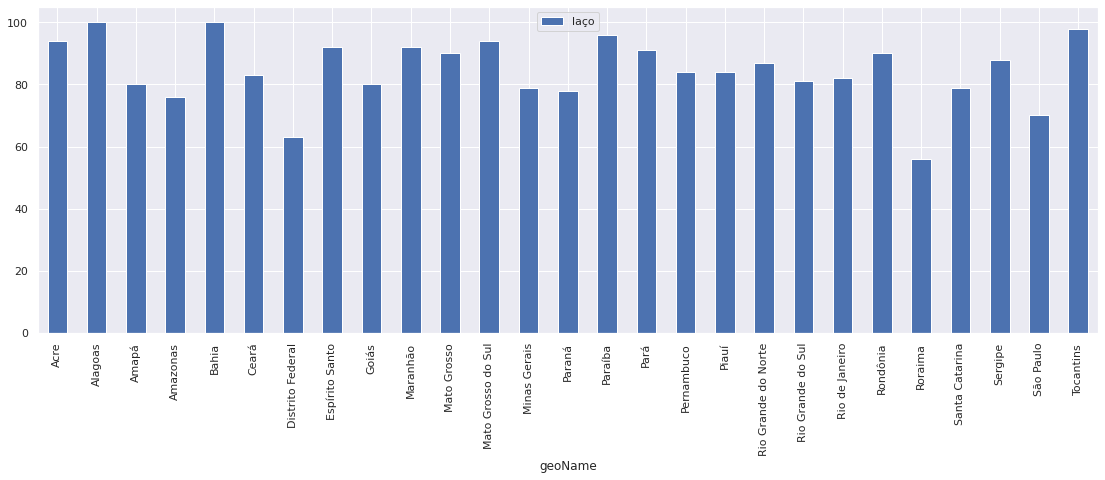

In [5]:
df = pytrends.interest_by_region()
df.head(27)
df.reset_index().plot(x = 'geoName', y = termo, figsize = (19, 6), kind = 'bar')

## Gráfico de consumo por período de laços.

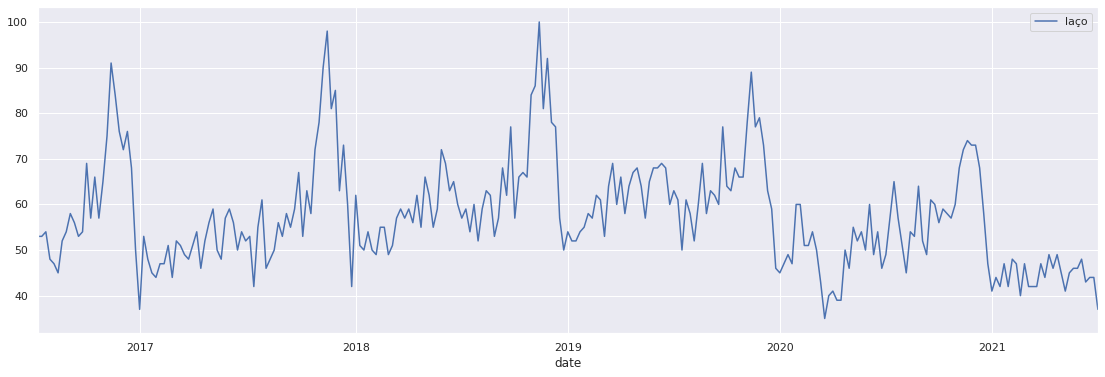

In [6]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=[termo])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=[termo], index='date')\
.plot(kind='line', stacked=True, figsize=(19,6))

## Gráfico de consumo por período de tiaras.

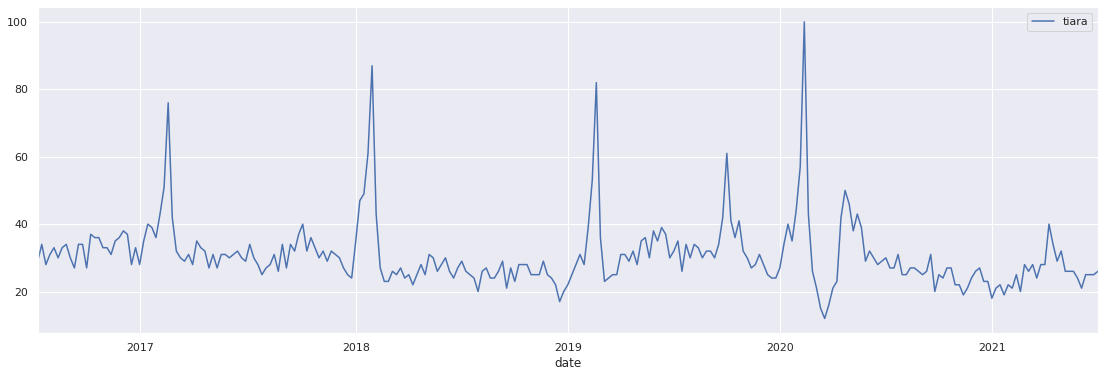

In [7]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=['tiara'])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=['tiara'], index='date')\
.plot(kind='line', stacked=True, figsize=(19,6))

## Gráfico de consumo por período de turbantes.

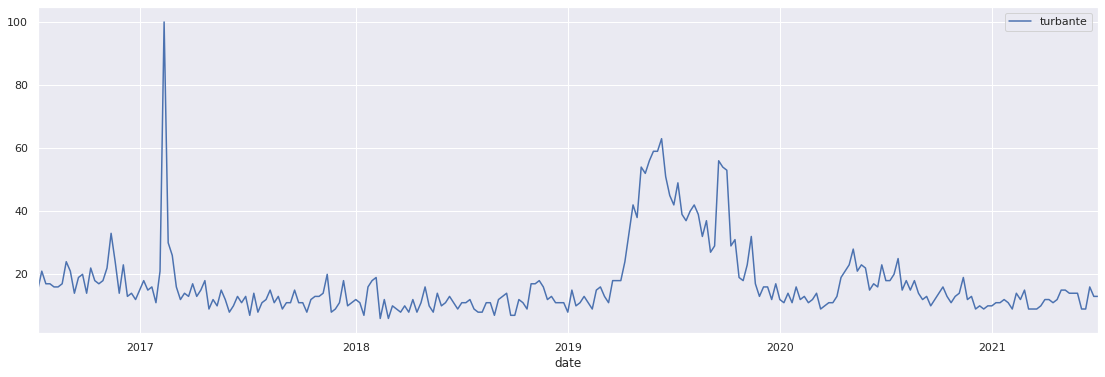

In [8]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=['turbante'])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=['turbante'], index='date')\
.plot(kind='line', stacked=True, figsize=(19,6))

## Comparativo entre os itens

In [9]:
kw_list = ['laço', 'tiara', 'turbante']
kw_group = list(zip(*[iter(kw_list)]*1))
print(kw_group)

[('laço',), ('tiara',), ('turbante',)]


In [10]:
kw_grplist = [list(x) for x in kw_group]
print(kw_grplist)

[['laço'], ['tiara'], ['turbante']]


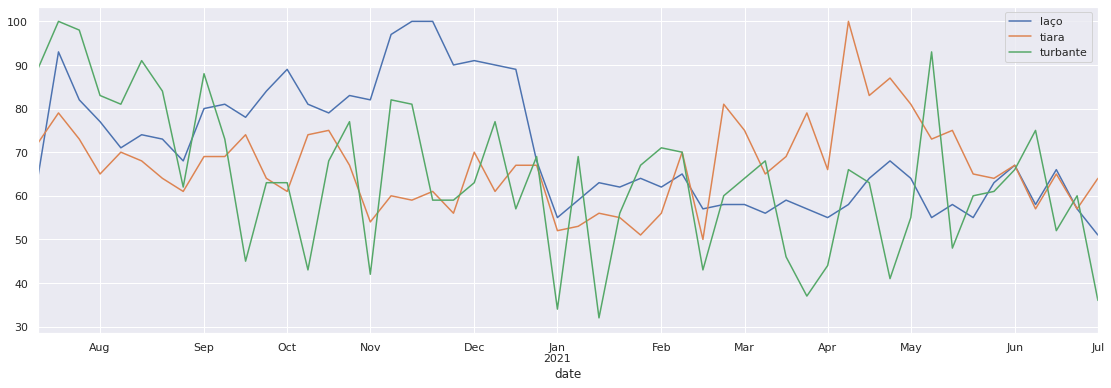

In [11]:
trendshow = TrendReq(hl='pt-BR', tz=360)
dict = {}
i = 0
for kw in kw_grplist:
    trendshow.build_payload(kw, timeframe = 'today 12-m', geo='BR')
    dict[i] = trendshow.interest_over_time()
    i += 1

trendframe = pd.concat(dict, axis=1)
trendframe.columns = trendframe.columns.droplevel(0)
trendframe = trendframe.drop('isPartial', axis = 1)
trendframe.plot(kind='line', stacked=False, figsize=(19,6))